In [2]:
import os
import io
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
results = []
logs = []
runs = list(range(1, 11))
trials = ['jump-f0', 'jump-f1']
for trial in trials:
    for run in runs:
        prefix = f'{trial}-{run}'
        if not os.path.exists(prefix+'_time.txt'):
            continue

        with open(prefix+'_time.txt') as f:
            time = float(f.read()) / 60
        with open(prefix+'_hof.txt') as f:
            fit = float(f.readlines()[0].strip())
        results.append(dict(trial=trial, run=run, fitness=fit, time=time))

        with open(prefix+'_log.txt') as f:
            data = f.read().replace(' ', '')
            log = pd.read_csv(io.StringIO(data), sep='\t')
            log['trial'] = trial
            log['run'] = run
            logs.append(log)

results = pd.DataFrame(results)
log = pd.concat(logs)
log

,gen,nevals,avg,stddev,min,max,trial,run
0,0,100,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,jump-f0,1
1,1,86,1.970150e-08,1.017870e-07,0.000000e+00,6.722590e-07,jump-f0,1
2,2,85,4.811020e-07,1.911240e-06,0.000000e+00,1.868970e-05,jump-f0,1
3,3,90,1.112970e-05,6.289940e-05,0.000000e+00,6.280650e-04,jump-f0,1
4,4,81,8.304890e-05,1.677530e-04,1.722920e-09,6.532270e-04,jump-f0,1
...,...,...,...,...,...,...,...,...
396,396,82,2.093540e+01,1.677570e+01,-1.000000e+00,3.536640e+01,jump-f1,10
397,397,83,1.915930e+01,1.697310e+01,-1.000000e+00,3.536640e+01,jump-f1,10
398,398,80,2.159540e+01,1.640640e+01,9.724910e-07,3.536640e+01,jump-f1,10
399,399,87,1.799670e+01,1.686460e+01,-1.000000e+00,3.536640e+01,jump-f1,10


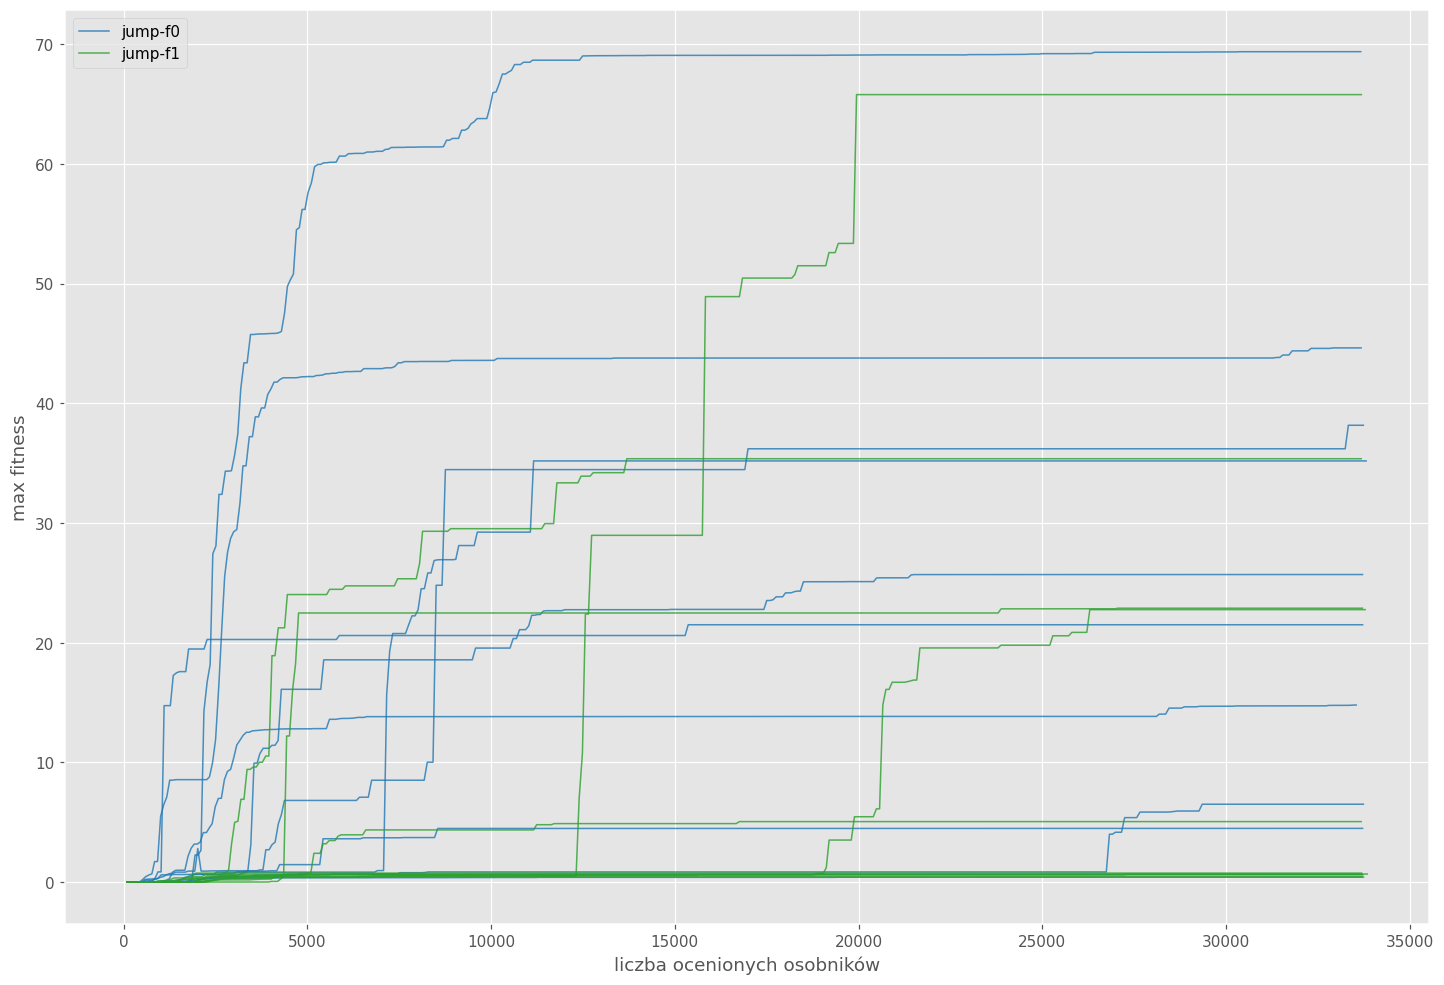

In [22]:
cmap = mpl.cm.get_cmap('tab10')
#colors = cmap(np.linspace(0, 0.5, len(trials)))
colors = 'tab:blue tab:green'.split()
        
def unique_legend(*args, **params):
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), *args, **params)

for trial, color in zip(trials, colors):
    for run in runs:
        df = log[(log.trial == trial) & (log.run == run)]
        if len(df) == 0: continue
        plt.plot(df.nevals.cumsum(), df['max'] * (df['max']>1e-3), label=trial, color=color, lw=1, alpha=0.8)

unique_legend(loc='upper left')
plt.xlabel('liczba ocenionych osobników')
plt.ylabel('max fitness')
plt.show()

Text(0, 0.5, 'max fitness')

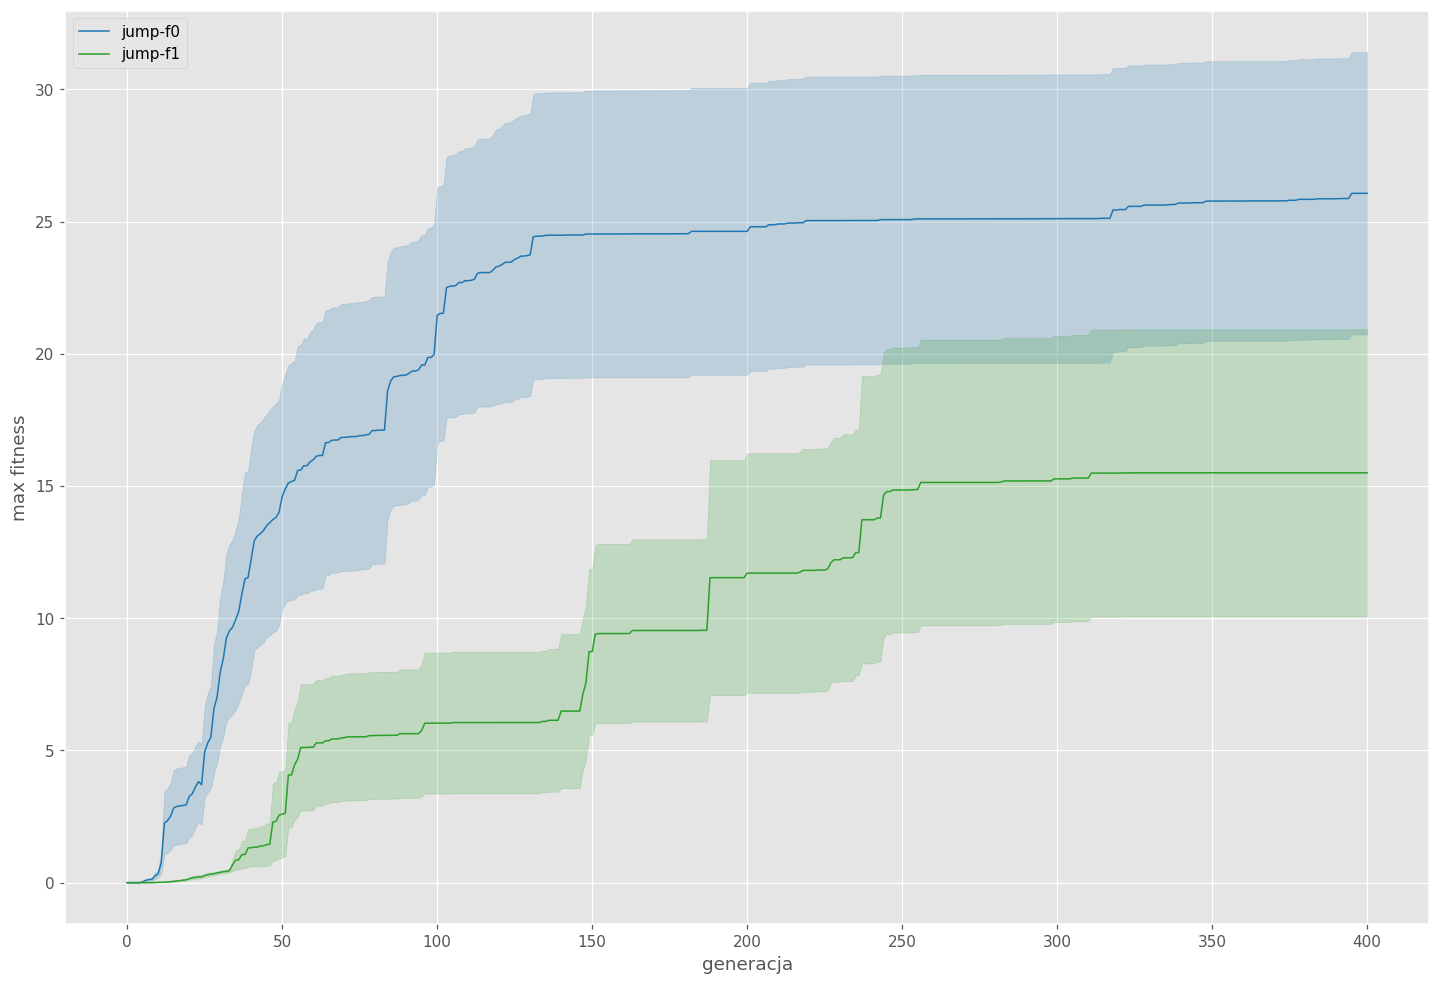

In [6]:
for color, trial in zip(colors, trials):
    df = log[log.trial == trial]
    if len(df) == 0: continue
    mean = df.groupby('gen').mean()['max']
    std = df.groupby('gen').std()['max'] / 4
    plt.plot(mean, label=f'{trial}', color=color)
    plt.fill_between(np.arange(401), mean - std, mean + std, color=color, alpha=0.2)
    
plt.legend(loc='upper left')
plt.xlabel('generacja')
plt.ylabel('max fitness')

Text(0, 0.5, 'time (minutes)')

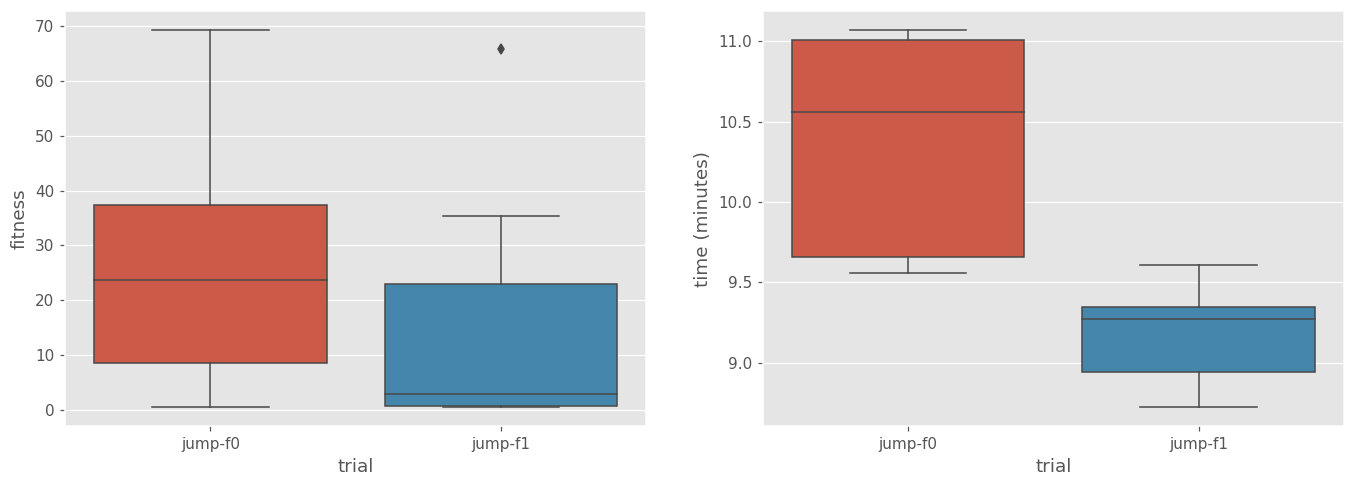

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
sns.boxplot(x='trial', y='fitness', data=results, ax=ax1)
sns.boxplot(x='trial', y='time', data=results, ax=ax2)
ax2.set_ylabel('time (minutes)')